# Projeto Oficina Maker
## Estudantes: Felipe Ferro Ramires, Michael da Silva e Verônica Scheifer
## Modelagem


# **pip install**

In [ ]:
!pip install category_encoders pyenchant
!pip download unidecode
!pip install unidecode
!pip install python-docx 
!pip install pyenchant && sudo apt-get install python-enchant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  File was already downloaded /content/Unidecode-1.3.6-py3-none-any.whl
Successfully downloaded unidecode
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-enchant is already the newest version (2.0.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


# **Importação**

In [ ]:
import enchant 
import numpy as np
from unidecode import unidecode
import unidecode 
import pandas as pd # importando o pandas para manipularmos o dataset
import seaborn as sns # importando o Seaborn para visualizar o comportamento dos dados
import category_encoders as ce 
import matplotlib.pyplot as plt # importando o Matplotlib para o elbow method

from category_encoders import *
from pandas_profiling import ProfileReport # importando o pandas-profiling para fazer o profile do dataset
from scipy import stats as sp
from sklearn.model_selection import train_test_split # utilizado para o split entre treinamento e teste
from sklearn.neighbors import KNeighborsRegressor # KNN para regressão
from sklearn.linear_model import LinearRegression # Regressão linear
from sklearn.svm import SVR # SVM para regressão
from sklearn.decomposition import PCA # PCA como aprendizagem não-supervisionada
from sklearn.preprocessing import RobustScaler # utilizado para que todas as entradas estejam na mesma escala numérica
from sklearn.preprocessing import StandardScaler
from pandas.core.frame import DataFrame
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/teste.csv', sep=';', encoding='ISO-8859-1') 

In [ ]:
df

ATENDIMENTO_BAIRRO_NOME           NATUREZA1_DESCRICAO  OCORRENCIA_ANO  \
0            CIDADE INDUSTRIAL                       Alarmes            2009   
1                   FAZENDINHA                         Roubo            2009   
2                      UBERABA                       Animais            2009   
3                SÍTIO CERCADO                       Animais            2009   
4                    TATUQUARA                       Alarmes            2009   
...                        ...                           ...             ...   
419066                REBOUÇAS                         Apoio            2022   
419067         CAPÃO DA IMBUIA                         Apoio            2022   
419068       CIDADE INDUSTRIAL  Fundada Suspeita (Abordagem)            2022   
419069                   BATEL                         Apoio            2022   
419070              CAPÃO RASO                         Apoio            2022   

       OCORRENCIA_DIA_SEMANA OCORRENCIA_HORA  OCORRENCIA_MES  OCORRENCIA_DIA  
0                     QUINTA        15:14:00               1               1  
1                     QUINTA        15:22:00               1               1  
2                     QUINTA        15:59:00               1               1  
3                     QUINTA        16:13:00               1               1  
4                     QUINTA        16:29:00               1               1  
...                      ...             ...             ...             ...  
419066                SÁBADO        01:15:00              10               1  
419067                SÁBADO        01:22:00              10               1  
419068                SÁBADO        00:38:00              10               1  
419069                 SEXTA        22:30:00               9              30  
419070                SÁBADO        01:42:00              10               1  

[419071 rows x 7 columns]

In [ ]:
df

ATENDIMENTO_BAIRRO_NOME           NATUREZA1_DESCRICAO  OCORRENCIA_ANO  \
0            CIDADE INDUSTRIAL                       Alarmes            2009   
1                   FAZENDINHA                         Roubo            2009   
2                      UBERABA                       Animais            2009   
3                SÍTIO CERCADO                       Animais            2009   
4                    TATUQUARA                       Alarmes            2009   
...                        ...                           ...             ...   
419066                REBOUÇAS                         Apoio            2022   
419067         CAPÃO DA IMBUIA                         Apoio            2022   
419068       CIDADE INDUSTRIAL  Fundada Suspeita (Abordagem)            2022   
419069                   BATEL                         Apoio            2022   
419070              CAPÃO RASO                         Apoio            2022   

       OCORRENCIA_DIA_SEMANA OCORRENCIA_HORA  OCORRENCIA_MES  OCORRENCIA_DIA  
0                     QUINTA        15:14:00               1               1  
1                     QUINTA        15:22:00               1               1  
2                     QUINTA        15:59:00               1               1  
3                     QUINTA        16:13:00               1               1  
4                     QUINTA        16:29:00               1               1  
...                      ...             ...             ...             ...  
419066                SÁBADO        01:15:00              10               1  
419067                SÁBADO        01:22:00              10               1  
419068                SÁBADO        00:38:00              10               1  
419069                 SEXTA        22:30:00               9              30  
419070                SÁBADO        01:42:00              10               1  

[419071 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419071 entries, 0 to 419070
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ATENDIMENTO_BAIRRO_NOME  418926 non-null  object
 1   NATUREZA1_DESCRICAO      419071 non-null  object
 2   OCORRENCIA_ANO           419071 non-null  int64 
 3   OCORRENCIA_DIA_SEMANA    419071 non-null  object
 4   OCORRENCIA_HORA          419071 non-null  object
 5   OCORRENCIA_MES           419071 non-null  int64 
 6   OCORRENCIA_DIA           419071 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 22.4+ MB


# **Informação do dataset**

In [ ]:
df['ATENDIMENTO_BAIRRO_NOME'].value_counts()

CENTRO                72247
CIDADE INDUSTRIAL     28776
SÍTIO CERCADO         25791
CAJURU                19367
BOQUEIRÃO             18875
                      ...  
JARDIM WEISSOPOLIS        1
SANTA TERESINHA           1
SÃO JORGE                 1
LOT. MARINONI             1
SÃO BENEDITO              1
Name: ATENDIMENTO_BAIRRO_NOME, Length: 191, dtype: int64

In [ ]:
df['NATUREZA1_DESCRICAO'].value_counts()

Apoio                              67967
Fundada Suspeita (Abordagem)       42792
Dano                               37587
Trânsito                           32026
Orientação                         26333
                                   ...  
Óbito (Defesa Civil)                   1
Rufianismo                             1
Corrupção ativa                        1
Prevaricação                           1
Obstrução da Atividade Policial        1
Name: NATUREZA1_DESCRICAO, Length: 187, dtype: int64

In [ ]:
df['OCORRENCIA_ANO'].value_counts()

2021    58731
2020    57453
2022    37333
2019    33762
2015    25566
2014    25303
2009    24903
2013    24470
2018    24153
2010    22531
2017    22137
2011    21484
2016    21469
2012    19776
Name: OCORRENCIA_ANO, dtype: int64

In [ ]:
df['OCORRENCIA_DIA_SEMANA'].value_counts()

SÁBADO     67692
DOMINGO    64524
SEXTA      61533
QUINTA     59549
QUARTA     57177
TERÇA      55124
SEGUNDA    53472
Name: OCORRENCIA_DIA_SEMANA, dtype: int64

In [ ]:
df['OCORRENCIA_MES'].value_counts()

3     38840
5     37766
7     37295
8     37167
9     36080
4     36016
6     35361
1     34801
2     32389
10    31900
12    31401
11    30055
Name: OCORRENCIA_MES, dtype: int64

In [ ]:
df['OCORRENCIA_HORA'].value_counts()

15:00:00    2907
16:00:00    2858
09:00:00    2511
14:00:00    2463
10:00:00    2424
            ... 
06:57:00      34
06:54:00      33
04:31:00      33
06:56:00      29
06:53:00      28
Name: OCORRENCIA_HORA, Length: 1440, dtype: int64

In [ ]:
df.describe()

OCORRENCIA_ANO  OCORRENCIA_MES  OCORRENCIA_DIA
count   419071.000000   419071.000000   419071.000000
mean      2016.652827        6.372899       15.770807
std          4.147116        3.371743        8.759268
min       2009.000000        1.000000        1.000000
25%       2013.000000        3.000000        8.000000
50%       2018.000000        6.000000       16.000000
75%       2020.000000        9.000000       23.000000
max       2022.000000       12.000000       31.000000

In [ ]:
#.median() Função Pandas retorna a mediana dos valores para o eixo solicitado.
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


OCORRENCIA_ANO    2018.0
OCORRENCIA_MES       6.0
OCORRENCIA_DIA      16.0
dtype: float64

In [ ]:
#.var() calcula a variância no Pandas através da função
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


OCORRENCIA_ANO    17.198568
OCORRENCIA_MES    11.368649
OCORRENCIA_DIA    76.724768
dtype: float64

# **Tratamento de dados**

## *Limpando dados nulos*

In [ ]:
for col in df.columns:
    if df[col].isnull().sum():
        total_null=df[col].isnull().sum() 
        print('Column: {} total null {}, i.e. {} %'.format(col,total_null,round(total_null*100/len(df),2)))

Column: ATENDIMENTO_BAIRRO_NOME total null 145, i.e. 0.03 %


In [ ]:
#Limpando dados nulos
df.dropna(inplace = True)
df.isnull().sum()

ATENDIMENTO_BAIRRO_NOME    0
NATUREZA1_DESCRICAO        0
OCORRENCIA_ANO             0
OCORRENCIA_DIA_SEMANA      0
OCORRENCIA_HORA            0
OCORRENCIA_MES             0
OCORRENCIA_DIA             0
dtype: int64

## *convertendo para int*

### *OCORRENCIA_HORA*

In [ ]:
#converteu para datetime
df['OCORRENCIA_HORA'] = pd.to_datetime(df['OCORRENCIA_HORA'])

In [ ]:
df['OCORRENCIA_HORA'].dt.time

0         15:14:00
1         15:22:00
2         15:59:00
3         16:13:00
4         16:29:00
            ...   
419066    01:15:00
419067    01:22:00
419068    00:38:00
419069    22:30:00
419070    01:42:00
Name: OCORRENCIA_HORA, Length: 418926, dtype: object

In [ ]:
#df['OCORRENCIA_HORA'] = df['OCORRENCIA_HORA'].dt.strftime('%H')
#df['OCORRENCIA_HORA'] = df['OCORRENCIA_HORA'].astype(str).astype(int)
# Wellington: dá para usar o "hour", abaixo
df['OCORRENCIA_HORA'] = df['OCORRENCIA_HORA'].dt.hour

In [ ]:
df['OCORRENCIA_HORA']

0         15
1         15
2         15
3         16
4         16
          ..
419066     1
419067     1
419068     0
419069    22
419070     1
Name: OCORRENCIA_HORA, Length: 418926, dtype: int64

### ATENDIMENTO_BAIRRO_NOME

In [ ]:
# Wellington: vou primeiro dar uma olhada na "cara" dos dados.
# Por isso o set: também fica ordenado em ordem alfabética
unique_bairros = set(df["ATENDIMENTO_BAIRRO_NOME"])
display(f'{len(unique_bairros)} nomes de bairros')
display(unique_bairros)

'191 nomes de bairros'

{' JARDIM OSASCO',
 ' JARDIM PEDRO DEMETE',
 'ABRANCHES',
 'AFONSO PENA',
 'AFONSO PENA ',
 'AGUAS BELAS',
 'AHÚ',
 'ALTO BOQUEIRÃO',
 'ALTO DA GLÓRIA',
 'ALTO DA RUA XV',
 'ATUBA',
 'AUGUSTA',
 'BACACHERI',
 'BAIRRO ALTO',
 'BAIRRO FICTÍCIO',
 'BAIRRO NAO INFORMADO',
 'BAIRRO NÃO LOCALIZAD',
 'BARIGUI',
 'BARREIRINHA',
 'BARRO PRETO',
 'BATEL',
 'BELAS AGUAS',
 'BIGORRILHO',
 'BOA VISTA',
 'BOM RETIRO',
 'BOQUEIRÃO',
 'BOQUEIRÃO ',
 'BORDA DO CAMPO',
 'BORDA DO CAMPO ',
 'BRAGA',
 'BUTIATUVINHA',
 'CABRAL',
 'CACHOEIRA',
 'CAJURU',
 'CAMPINA DO SIQUEIRA',
 'CAMPINHA GRANDE DO S',
 'CAMPO COMPRIDO',
 'CAMPO DE SANTANA',
 'CAMPO DE SÃO BENEDIT',
 'CAMPO LARGO',
 'CAMPO PEQUENO',
 'CAMPO PEQUENO ',
 'CANGUIRI',
 'CAPÃO DA IMBUIA',
 'CAPÃO RASO',
 'CASCATINHA',
 'CAXIMBA',
 'CENTRO',
 'CENTRO ',
 'CENTRO CÍVICO',
 'CIC',
 'CIDADE INDUSTRIAL',
 'CIDADE INDUSTRIAL DE',
 'CIDADE JARDIM',
 'COLOMBO',
 'COLONIA FARIA',
 'COLONIA SAO VENANCIO',
 'CRISTO REI',
 'ESTADOS',
 'ESTANCIA PINHAIS ',
 

In [ ]:
# Wellington: vi alguns espaços no começo e no fim das strings, e também acentos.
# Vou arrumar isso. Queremos reduzir os 191 bairros.

# criando uma nova coluna para que possa testar
df["ATENDIMENTO_BAIRRO_NOME_FIXED"] = df["ATENDIMENTO_BAIRRO_NOME"].copy()

# removendo espaços no início e fim da string, e colocando tudo em maiúscula
df["ATENDIMENTO_BAIRRO_NOME_FIXED"] = df["ATENDIMENTO_BAIRRO_NOME_FIXED"].str.upper().str.strip()

# removendo acentos
df["ATENDIMENTO_BAIRRO_NOME_FIXED"] = df["ATENDIMENTO_BAIRRO_NOME_FIXED"].apply(lambda x: unidecode.unidecode(x))

# removendo pontos
df["ATENDIMENTO_BAIRRO_NOME_FIXED"] = df["ATENDIMENTO_BAIRRO_NOME_FIXED"].str.replace('.', '', regex=False)

In [ ]:
# Wellington: cálculo da distância de Levenshtein
unique_bairros = list(set(df["ATENDIMENTO_BAIRRO_NOME_FIXED"]))

# calculando a distância de Levenshtein entre todos os bairros após o tratamento
all_distances = []
for i in range(len(unique_bairros)):
    for j in range(i+1, len(unique_bairros)):
        levenshtein_distance = enchant.utils.levenshtein(unique_bairros[i], unique_bairros[j])
        all_distances.append([levenshtein_distance, unique_bairros[i], unique_bairros[j]])
        
# mostrando as combinações com as menores distâncias
display(pd.DataFrame(all_distances, columns=['Distance', 'Bairro 1', 'Bairro 2']).sort_values(
    by='Distance').head(40))

Distance           Bairro 1              Bairro 2
5785          1         SAO THOMAZ            SAO THOMAS
10172         1           IGUACU 1             IGUACU 01
3073          1                 NI                    NF
13139         1    SANTA TERESINHA       SANTA TEREZINHA
3091          2                 NI                   CIC
1888          2           SAO JOSE             SAO JORGE
5565          2             TANGUA                TINGUI
1806          2           SAO JOSE              SAO JOAO
4671          2   JARDIM BOA VISTA     JARDIM BELA VISTA
3138          3                 NI                   AHU
8837          3                CIC                   AHU
1222          3               MAUA                 ATUBA
3004          3  CIDADE INDUSTRIAL  CIDADE INDUSTRIAL DE
1080          3               MAUA                TANGUA
358           3              HAUER                  MAUA
13372         3                AHU                 ATUBA
11849         3            CAXIMBA                 XAXIM
1133          3               MAUA                UMBARA
5530          3             TANGUA                TARUMA
6244          3        BARREIRINHA           PALMEIRINHA
10572         3             TARUMA                 ATUBA
1123          3               MAUA                 BRAGA
4808          3           SAO BRAZ              SAO JOAO
1120          3               MAUA                TARUMA
6495          3                 NF                   CIC
10818         3              BRAGA               UBERABA
6414          3             CABRAL                TABOAO
463           3              HAUER                 BATEL
6542          3                 NF                   AHU
11356         3           SAO JOAO             SAO JORGE
1152          3               MAUA                   AHU
1157          4               MAUA                 BATEL
13967         4             TABOAO                PORTAO
1161          4               MAUA                TABOAO
3141          4                 NI                TINGUI
3351          4             CAJURU              CANGUIRI
407           4              HAUER                 FANNY
3346          4             CAJURU                CENTRO
5501          4             TANGUA               AUGUSTA
8360          4              FANNY                 BATEL

In [ ]:
# criando um dicionário para padronizar casos específicos
bairros_excecoes = {
    'IGUACU 01': 'IGUACU 1',
    'SAO THOMAZ': 'SAO THOMAS',
    'NF': 'NAO INFORMADO',
    'SANTA TEREZINHA': 'SANTA TERESINHA',
    'CIDADE INDUSTRIAL DE': 'CIC',
    'CIDADE INDUSTRIAL': 'CIC',
    'NAO ENCONTRADO': 'NAO INFORMADO',
    'NI': 'NAO INFORMADO',
    'SEM DADOS': 'NAO INFORMADO',
    'SAO JOSE' : 'SAO JOSE DOS PINHAIS',
    'BAIRRO NAO LOCALIZAD' : 'NAO INFORMADO'
}

df["ATENDIMENTO_BAIRRO_NOME_FIXED"] = df["ATENDIMENTO_BAIRRO_NOME_FIXED"].replace(bairros_excecoes)

# Wellington: fomos de 191 bairros para 170. Isso é bom para a qualidade do modelo
display(len(set(df["ATENDIMENTO_BAIRRO_NOME_FIXED"])))

168

In [ ]:
df["ATENDIMENTO_BAIRRO_NOME"] = df["ATENDIMENTO_BAIRRO_NOME_FIXED"]

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df["ATENDIMENTO_BAIRRO_NOME"])

LabelEncoder()

In [ ]:
dicionario = {}
dicionario = le.classes_
my_list = list(dicionario)

In [ ]:
print(my_list[152])#dicionario deo numero do campo bairro para texto

TARUMA


In [ ]:
df["ATENDIMENTO_BAIRRO_NOME"] = le.fit_transform(df["ATENDIMENTO_BAIRRO_NOME"])

### OCORRENCIA_DIA_SEMANA

In [ ]:
# Wellington: uma boa é converter o dia da semana para números em uma ordem fixa,
# já que há uma ordem de precedência aqui (terça vem depois da segunda e antes da quarta, por exemplo)

dias_semana = {
    'SÁBADO': 0,
    'DOMINGO': 1,
    'SEGUNDA': 2,
    'TERÇA': 3,
    'QUARTA': 4,
    'QUINTA': 5,
    'SEXTA': 6,
}

df['OCORRENCIA_DIA_SEMANA'] = df['OCORRENCIA_DIA_SEMANA'].replace(dias_semana)

### NATUREZA1_DESCRICAO

In [ ]:
df['NATUREZA1_DESCRICAO'] = df['NATUREZA1_DESCRICAO'].replace({'Apoio':1, 'Alarmes':2, 'Invasão':3, 'Vistoria':4, 'Roubo':5, 'Perturbação do sossego':6, 'Trânsito':7, 'Risco de acidente/à vida (Defesa Civil)':8, 'Violação de Medida Protetiva Lei Maria da Penha':9, 'Dano':10, 'Lesão Corporal':11, 'Fundada Suspeita (Abordagem)':12, 'Substância Ilícita':13, 'Orientação':14, 'Alagamento':15, 'Animais':16, 'Furto':17, 'Desinteligência':18, 'Patrulha Maria da Penha':19, 'Atitude Suspeita':20, 'Atos obscenos/libidinosos':21, 'Vias de fato':22, 'Queima a céu aberto':23, 'Ameaça':24, 'Averiguação':25, 'Encaminhamento':26, 'Estupro':27, 'Saturação':28, 'Agressão física/verbal':29, 'AIFU':30, 'Escolta':31, 'Incêndio':32, 'Risco de acidente / à vida':33, 'Desacato':34, 'Paciente/usuário alterado':35, 'Veículo':36, 'Pesca em local proibido':37, 'Ronda':38, 'Destelhamento':39, 'Construção Irregular':40, 'Crime ambiental':41, 'Risco de desabamento / desmoronamento':42, 'Tentativa':43, 'Fornecimento de Lona':44, 'Suicídio':45, 'Obstrução de via':46, 'Substância Lícita':47, 'Depósito irregular':48, 'Corte irregular de árvore':49, 'Achado':50, 'Queda de árvore':51, 'Disparo de arma':52, 'Órgãos acionados':53, 'Averiguação (Defesa Civil)':54, 'Antecedentes Criminais - Verificação':55, 'Injúria':56, 'Desaparecimento':57, 'Manifestação':58, 'Seqüestro e cárcere privado':59, 'Arrastão':60, 'Deslizamenton de Terra':61, 'ZELADORIA URBANA':62, 'Desabamento':63, 'Devolução de coisa achada':64, 'Conduta inconveniente':65, 'Uso indevido do cartão transporte':66, 'Maus tratos à pessoas':67, 'Extravio de Equipamento':68, 'Porte Ilegal':69, 'Rixa':70, 'Erosão':71, 'Importunação\xa0sexual':72, 'Situação de risco':73, 'Queda de fios de energia':74, 'Estelionato':75, 'Desobediência':76, 'Racismo':77, 'Homicídio':78, 'Queda de galho':79, 'Homofobia':80, 'Descumprimento lei 15799/2021 COVID-19':81, 'Fuga de aluno/interno':82, 'Menores abordando transeuntes':83, 'Abandono de incapaz':84, 'Risco de queda de árvore':85, 'Retirada de invasão':86, 'Banho em local impróprio':87, 'Abuso de incapazes':88, 'Contrabando ou descaminho':89, 'Criança perdida/desaparecida':90, 'Extravio, sonegação ou inutilização de livro ou doc.':91, 'Resistência':92, 'Aliciamento de menor':93, 'Apropriação indébita':94, 'Proteção ao patrimônio':95, 'Infiltração':96, 'Roubo, furto, extravio, recuperação, apreensão de armas de fogo.':97, 'Receptação':98, 'Ataque de insetos':99, 'Fiscalizações e Orientações':100, 'Vazamento ou derramamento de Produto Perigoso ou Infectante':101, 'Falsidade ideológica (Falsa Identidade)':102, 'Câmera Off-Line':103, 'Poluição visual/ambiental':104, 'Óbito':105, 'Avaria em Equipamento/Patrimônio (não intencional)':106, 'Fuga de paciente':107, 'Moeda Falsa':108, 'Embriaguez':109, 'Queda de poste':110, 'Material abandonado':111, 'Calote':112, 'Quedas de objetos ou partes de construções':113, 'Acidente Viatura':114, 'Risco de queda de poste':105, 'Constrangimento ilegal':106, 'Comércio ambulante':107, 'Usar de uniforme, ou distintivo de função pública que não exerce':108, 'Envenenamento':109, 'Denúncia de bomba':110, 'Mendigar, por ociosidade ou cupidez':111, 'Extorsão':112, 'Atentado violento ao pudor':113, 'Verificação':114, 'Pragas Animais':115, 'Inundação/Enchente':116, 'Importunação ofensiva ao pudor':117, 'Jogo de Azar':118, 'Porte de artefato explosivo':119, 'Maus tratos a animais':120, 'Calúnia':121, 'Sedução':122, 'Violência arbitrária':123, 'Afogamento':124, 'Explosão':125, 'Câmeras de videomonitoramento':126, 'Bueiro aberto/sem tampa':127, 'Menor gazeando aula':128, 'Fornecimento de bebida alcoólica à menores':129, 'Vadiagem':130, 'Discriminação':131, 'Escrito ou objeto obsceno (panfletos pornográficos)':132, 'Favorecimento da prostituição':133, 'Peculato':134, 'Impedimento ou perturbação de cerimônia funerária':135, 'Risco de queda de fios de energia':136, 'Ataque cão feroz':137, 'Abandono de função':138, 'Uso indevido do telefone público':139, 'Aterro irregular':140, 'Risco de explosão':141, 'Obstrução da Atividade Policial':142, 'Bueiro entupido':143, 'Corrupção de menores':144, 'Queda de aeronave':145, 'Incendio/Explosão em edificação':146, 'Vilipêndio a cadáver':147, 'Risco de queda de galho':148, 'Prostituição':149, 'Violação de sepultura/túmulo':150, 'Fingir-se funcionário público':151, 'Trote Telefonico':152, 'Apologia de crime ou criminoso':153, 'Falsificação de documento Publico':154, 'Denuncia Improcedente':155, 'Quadrilha ou bando':156, 'Desabamento de Telhado/Cobertura':157, 'Exploração de menores':158, 'Queda de Muro':159, 'Abalo Sísmico':160, 'Omissão de socorro':161, 'Rompimento de Barragem':162, 'Liberação de pessoa presa/apreendida por recusa no recebimento pela DP':163, 'Venda proibida de produtos específicos à menores':164, 'Concussão':165, 'Charlatanismo':166, 'Difamação':167, 'RECUSAR SE IDENTIFICAR AO POLICIAL':168, 'Perseguição (stalking)':169, 'Enxurrada':170, 'Rufianismo':171, 'Incitação ao crime':172, 'Averiguação (COSEDI)':173, 'Queda de Revestimento de Fachadas':174, 'Corrupção ativa':175, 'Óbito (Defesa Civil)':176, 'Prevaricação':177}) 

In [ ]:
df['NATUREZA1_DESCRICAO'] = df['NATUREZA1_DESCRICAO'].astype(str).astype(int)

# **Gráfico**

In [ ]:
pd.set_option("display.float_format", lambda x: "%.0f" % x)

**Qual ano possui mais atendimento?**

<Figure size 1440x1440 with 0 Axes>

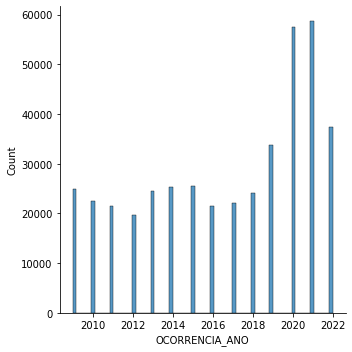

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df,  x='OCORRENCIA_ANO')

Resposta: 2021, 2020 e 2022

**Qual bairro possui mais atendimento?**

<Figure size 720x720 with 0 Axes>

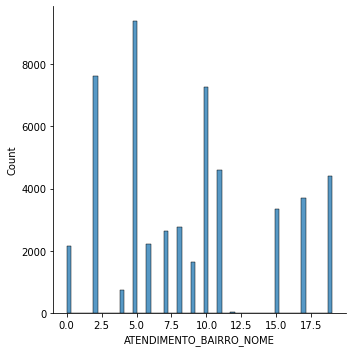

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],  x='ATENDIMENTO_BAIRRO_NOME')

Resposta: 8: Centro, 1: CIC e 4: SÍTIO CERCADO

**Qual ano por bairro possui mais atendimento?**

<Figure size 7200x5760 with 0 Axes>

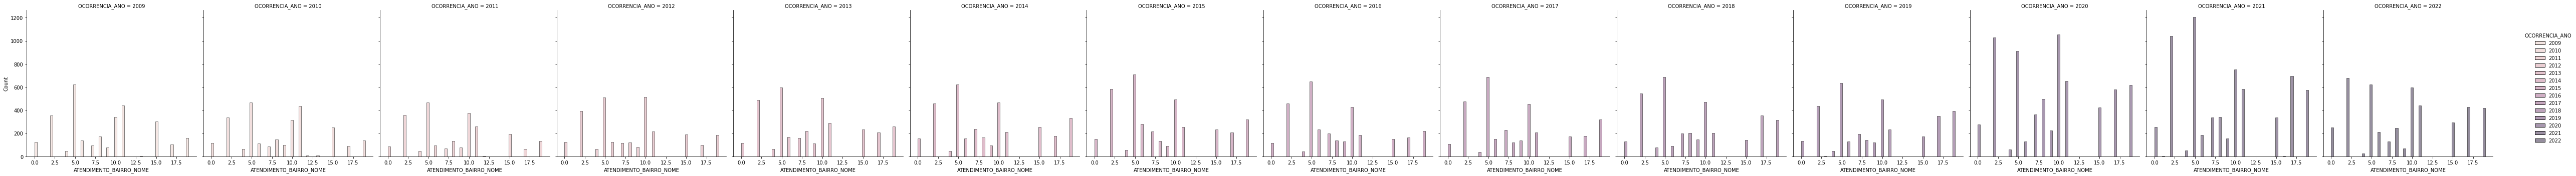

In [ ]:
plt.figure(figsize=(100,80))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],  x='ATENDIMENTO_BAIRRO_NOME', hue='OCORRENCIA_ANO', col='OCORRENCIA_ANO', color='red')

Resposta: 

`2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018 e 2019;`
*   1ºlugar: 8, Centro. 
*   2ºlugar: 1, CIC.
*   3ºlugar: 4: SÍTIO CERCADO.


`2020: `
*   1ºlugar: 8, Centro. 
*   2ºlugar: 4: SÍTIO CERCADO.
*   3ºlugar: 1, CIC.

`2021: 2022`
*   1ºlugar: 8, Centro. 
*   2ºlugar: 1, CIC.
*   3ºlugar: 4: SÍTIO CERCADO.



**Qual o tipo de natureza da ocorrência?**

<Figure size 1440x1440 with 0 Axes>

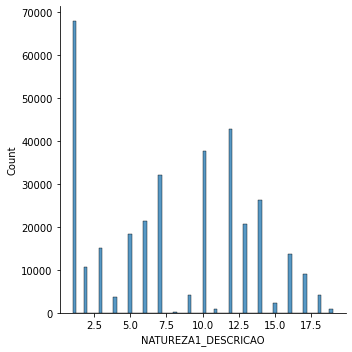

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df[df['NATUREZA1_DESCRICAO']<20],  x='NATUREZA1_DESCRICAO')

Resposta: 1: Apoio, 12: Fundada Suspeita (Abordagem) e 10: Dano

**Qual o tipo de natureza da ocorrência em cada bairro?** 

(1.0, 20.0)

<Figure size 1440x1440 with 0 Axes>

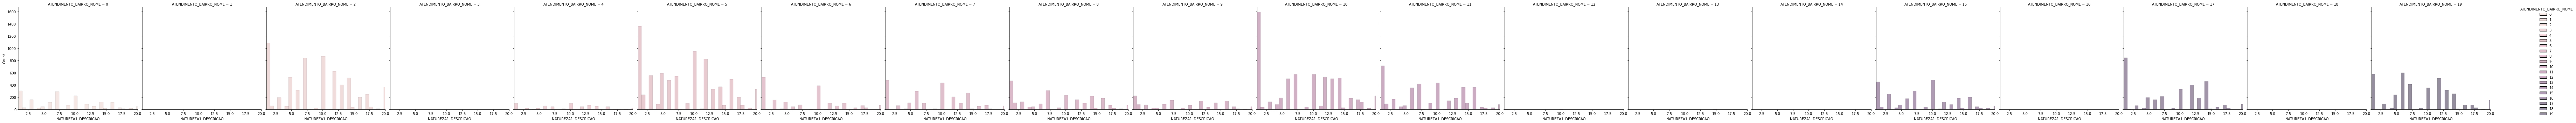

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],   x='NATUREZA1_DESCRICAO', hue='ATENDIMENTO_BAIRRO_NOME', col='ATENDIMENTO_BAIRRO_NOME', color=['black'])
plt.xlim(1,20)

Resposta: foram utilizado so os 20 tipo de ATENDIMENTO_BAIRRO_NOME e ATENDIMENTO_BAIRRO_NOMe, que se tem mais registro.

**Qual horário da ocorrência mais frequente?**

<Figure size 1440x1440 with 0 Axes>

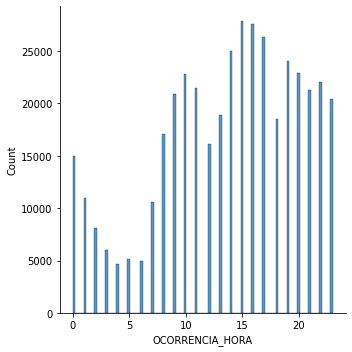

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df,  x='OCORRENCIA_HORA')

Resposta: 15 14 e 16

**Qual horário mas a semana mais frequente?**

<Figure size 1440x1440 with 0 Axes>

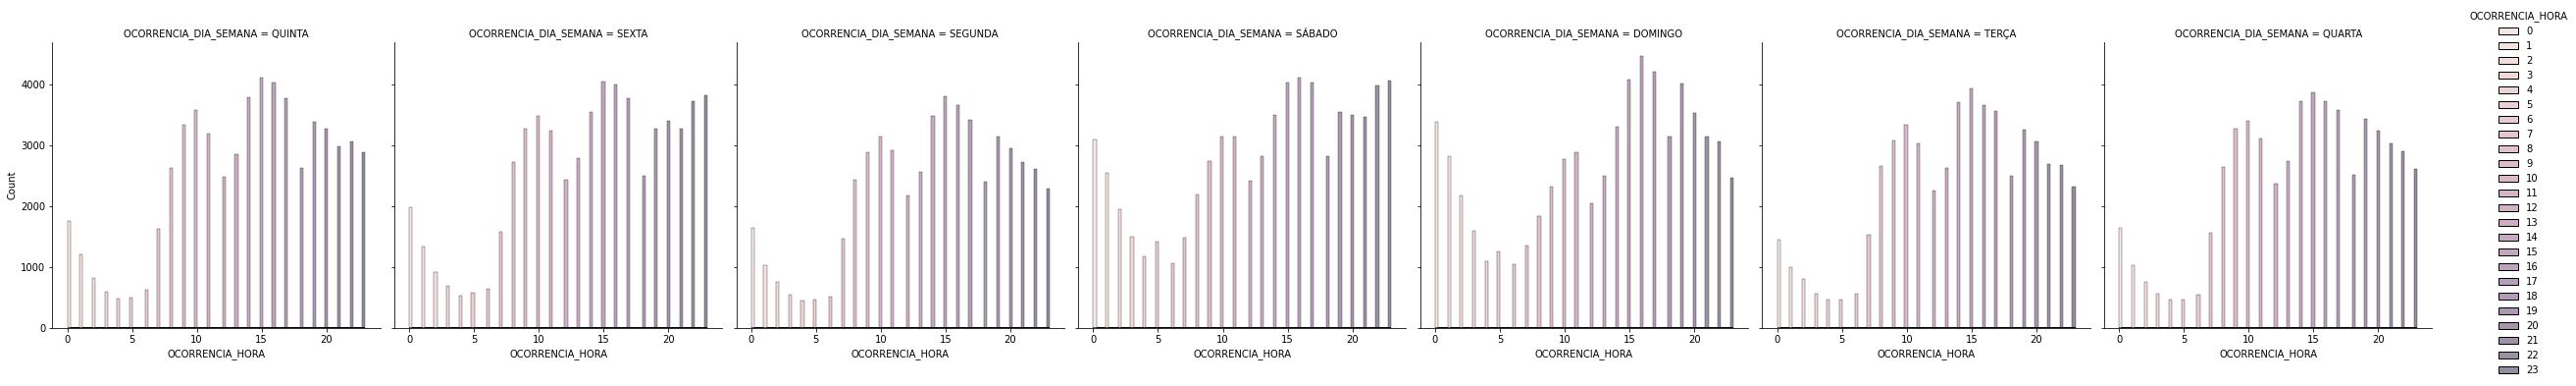

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df,  x='OCORRENCIA_HORA', hue='OCORRENCIA_HORA', col='OCORRENCIA_DIA_SEMANA')

Resposta: final de semana a mais ocorrencia a tarde, 13h ate umas 20h

**Qual horário mais a semana e o bairro mais frequentes?**

<Figure size 1440x1440 with 0 Axes>

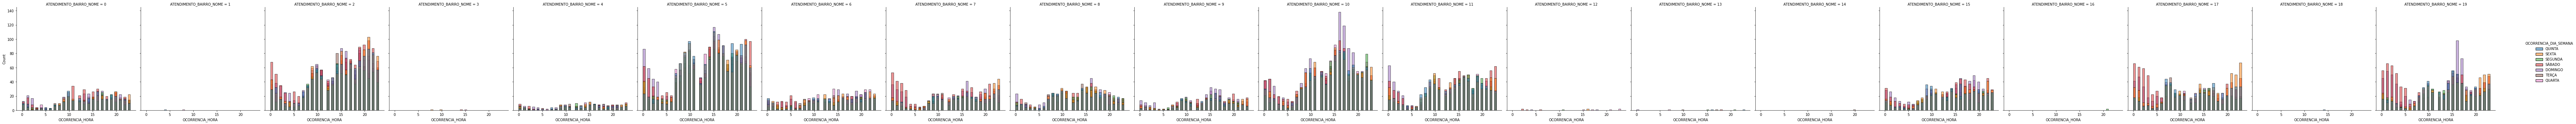

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],  x='OCORRENCIA_HORA', hue='OCORRENCIA_DIA_SEMANA', col='ATENDIMENTO_BAIRRO_NOME', color=['black'])

Resposta: Bairro 8, centro tem mais registro de manha e a tarde ja 1, CIC e 4 SÍTIO CERCADO, se mantem igual com descanso so na madrugada

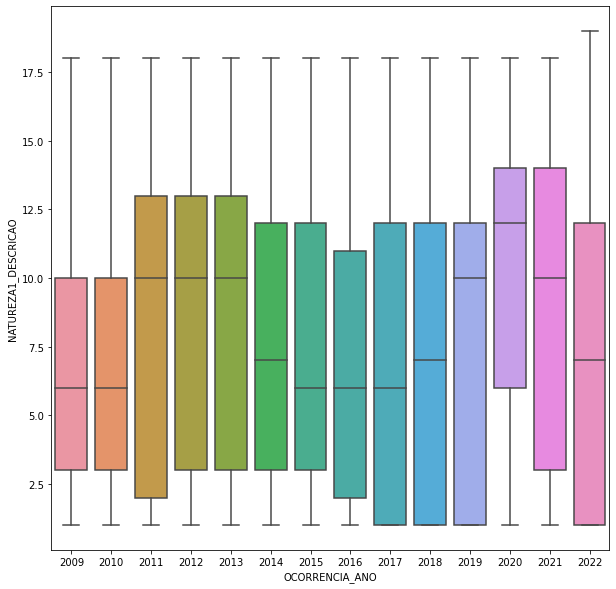

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[df['NATUREZA1_DESCRICAO']<20],   x='OCORRENCIA_ANO', y='NATUREZA1_DESCRICAO')

# **Aprendizado de máquina**

## WOEEncoder

In [ ]:
#vou usar aqui um exemplo do WOEEncoder.
# Ele é bom para problemas de classificação binária (prever algo como sim/não, positivo/negativo)
# vou criar uma coluna para a gente testar: algo como
# "a ocorrência é ou não é em fim de semana?"

# ah, lembrete: é bom que estas transformações de dados ocorram somente no dataset de treino, senão
# há o risco de leakage nos dados. Ou seja: não podemos ver o WeightOfEvidence de uma base
# que seria usada depois para validação, senão há o risco de "repassarmos segredos" ao modelo.

df['OCORRENCIA_FIM_SEMANA'] = df['OCORRENCIA_DIA_SEMANA'] <= 1
df['ATENDIMENTO_BAIRRO_NOME_FIXED'] = ce.WOEEncoder().fit_transform(df['ATENDIMENTO_BAIRRO_NOME_FIXED'], df['OCORRENCIA_FIM_SEMANA'])

In [ ]:
df.drop('ATENDIMENTO_BAIRRO_NOME_FIXED', axis=1)

ATENDIMENTO_BAIRRO_NOME  NATUREZA1_DESCRICAO  OCORRENCIA_ANO  \
0                            43                    2            2009   
1                            53                    5            2009   
2                           157                   16            2009   
3                           147                   16            2009   
4                           153                    2            2009   
...                         ...                  ...             ...   
419066                      120                    1            2022   
419067                       37                    1            2022   
419068                       43                   12            2022   
419069                       17                    1            2022   
419070                       38                    1            2022   

        OCORRENCIA_DIA_SEMANA  OCORRENCIA_HORA  OCORRENCIA_MES  \
0                           5               15               1   
1                           5               15               1   
2                           5               15               1   
3                           5               16               1   
4                           5               16               1   
...                       ...              ...             ...   
419066                      0                1              10   
419067                      0                1              10   
419068                      0                0              10   
419069                      6               22               9   
419070                      0                1              10   

        OCORRENCIA_DIA  OCORRENCIA_FIM_SEMANA  
0                    1                  False  
1                    1                  False  
2                    1                  False  
3                    1                  False  
4                    1                  False  
...                ...                    ...  
419066               1                   True  
419067               1                   True  
419068               1                   True  
419069              30                  False  
419070               1                   True  

[418926 rows x 8 columns]

##**Sem o scaler**
##**Divisão entre treino e teste**

In [ ]:
# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1), # aqui informamos os atributos
                                                                        df['ATENDIMENTO_BAIRRO_NOME'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.20, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos i

In [ ]:
modelo_knn = KNeighborsRegressor().fit(X_train, y_train)
modelo_knn.score(X_test, y_test)

-0.12236316906201905

In [ ]:
modelo_lr = LinearRegression().fit(X_train, y_train)
modelo_lr.score(X_test, y_test)

0.09663379738948774

In [ ]:
modelo_svm = SVR().fit(X_train, y_train)
modelo_svm.score(X_test, y_test)

##**Com o scaler**
## **Divisão entre treino e teste**

In [ ]:
# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(RobustScaler().fit_transform(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1)), # aqui informamos os atributos
                                                                        df['ATENDIMENTO_BAIRRO_NOME'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.20, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos i

In [ ]:
modelo_knn = KNeighborsRegressor().fit(X_train, y_train)
modelo_knn.score(X_test, y_test)

0.06822136943177604

In [ ]:
modelo_lr = LinearRegression().fit(X_train, y_train)
modelo_lr.score(X_test, y_test)

0.09663379738948774

In [ ]:
modelo_svm = SVR().fit(X_train, y_train)
modelo_svm.score(X_test, y_test)

## PCA

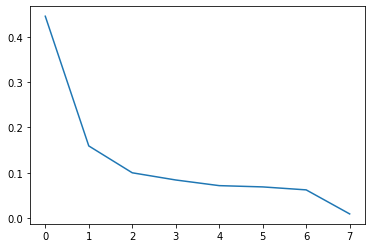

In [ ]:
pca = PCA().fit(RobustScaler().fit_transform(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1)))
plt.plot(pca.explained_variance_ratio_)

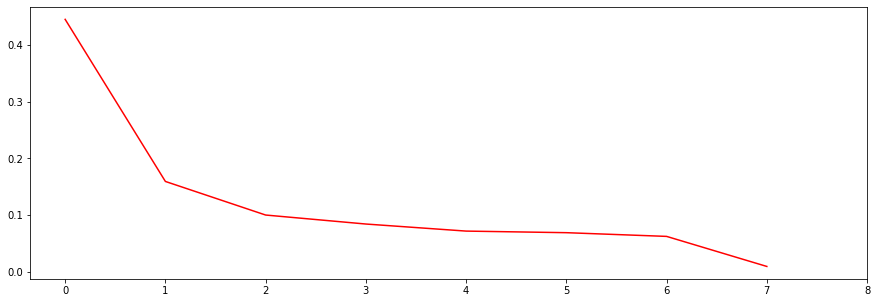

In [ ]:
plt.figure(figsize=(15, 5)) # criando um gráfico retangular para facilitar a visualização
plt.plot(pca.explained_variance_ratio_, color='r') # colocando a porcentagem de variância que cada componente nos trouxe
plt.xticks(np.arange(df.shape[1])) # mostrando todos os números no eixo x
plt.show() # mostrando o gráfico final

In [ ]:
# split entre treinamento e teste
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(PCA(n_components=5).fit_transform(RobustScaler().fit_transform(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1))), # aqui informamos os atributos
                                                                        df['ATENDIMENTO_BAIRRO_NOME'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.25, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que a

In [ ]:
modelo_knn = KNeighborsRegressor().fit(X_train, y_train)
modelo_knn.score(X_test, y_test)

0.06822136943177604

In [ ]:
modelo_lr = LinearRegression().fit(X_train, y_train)
modelo_lr.score(X_test, y_test)

0.09663379738948774

In [ ]:
modelo_svm = SVR().fit(X_train, y_train)
modelo_svm.score(X_test, y_test)

### Mostrando as previsões

In [ ]:
df_test = pd.DataFrame(X_test) 
df_test['Quality_Real'] = y_test.values
df_test['Quality_Predicao_KNN'] = modelo_knn.predict(X_test)
df_test['Quality_Predicao_Linear'] = modelo_lr.predict(X_test)
#df_test['Quality_Predicao_SVM'] = modelo_svm.predict(X_test)
df_test

0         1     2         3         4         5         6    7  \
0      0.000000 -0.857143 -0.50 -1.666667 -0.833333  0.400000 -1.184319  1.0   
1      2.545455  0.571429  0.75 -0.111111  0.000000 -0.400000 -1.184319  0.0   
2      2.363636  0.428571 -0.25  0.222222 -0.666667  0.400000 -1.184319  0.0   
3      0.181818  0.285714  0.00 -0.888889 -0.666667 -0.333333 -1.184319  0.0   
4     -0.818182 -0.285714 -0.50  0.777778 -0.333333  0.533333  0.000000  1.0   
...         ...       ...   ...       ...       ...       ...       ...  ...   
83781  0.000000 -1.000000  0.25 -0.666667  0.666667 -0.266667 -0.389993  0.0   
83782  0.363636  0.285714  0.50 -0.666667 -0.833333 -0.466667  0.294471  0.0   
83783 -0.727273 -1.285714 -0.25  0.777778  0.833333  0.933333 -0.379551  0.0   
83784  0.454545 -1.000000 -0.75  0.555556 -0.333333 -0.933333 -0.412457  1.0   
83785 -0.818182 -0.428571 -0.50 -0.777778  0.333333  0.933333 -0.777419  1.0   

       Quality_Real  Quality_Predicao_KNN  Quality_Predicao_Linear  
0                41                  41.0                49.835526  
1                41                  56.8                49.699750  
2                41                  80.4                50.215436  
3                41                  41.0                50.742242  
4                43                  21.6                72.452248  
...             ...                   ...                      ...  
83781             5                  54.8                64.615779  
83782            17                  51.2                77.001572  
83783            32                 102.6                65.653588  
83784            37                  57.2                64.249554  
83785            48                  55.6                58.070839  

[83786 rows x 11 columns]

## DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1), df['ATENDIMENTO_BAIRRO_NOME'], test_size=0.2, random_state=0)

In [ ]:
# criando o modelo
modelo_dt = DecisionTreeRegressor().fit(X_train, y_train)
modelo_dt.score(X_test, y_test)


0.9995795333375131

## LGBMClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1), df['ATENDIMENTO_BAIRRO_NOME'], test_size=0.2, random_state=0)

In [ ]:
modelo_LGBM = LGBMClassifier(random_state=0).fit(X_train, y_train)
modelo_LGBM.score(X_test, y_test)

0.1960112667987492

In [ ]:
modelo_LGBM.predict(X_test)

array([41,  5, 41, ..., 41, 28, 41])

## RandomForestRegressor e XGBoost

In [ ]:
# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1), # aqui informamos os atributos
                                                                    df['ATENDIMENTO_BAIRRO_NOME'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                    test_size=0.20, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                    random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos iniciem de forma aleatória a sua divisão.

In [ ]:
modelo_rfr = RandomForestRegressor(random_state=0).fit(X_train, y_train)
predicoes_rfc = modelo_rfr.predict(X_test)
modelo_rfr.score(X_test, y_test)

0.9997674831763721

In [ ]:
modelo_xgb = XGBClassifier(random_state=0).fit(X_train, y_train)
predicoes_xgb = modelo_xgb.predict(X_test)
modelo_xgb.score(X_test, y_test)

0.999701620795837

In [ ]:
resultados_classificacao = pd.DataFrame(y_test)
resultados_classificacao['Predicao_RandomForest'] = predicoes_rfc
resultados_classificacao['Predicao_XGBoost'] = predicoes_xgb

resultados_classificacao

ATENDIMENTO_BAIRRO_NOME  Predicao_RandomForest  Predicao_XGBoost
69969                        41                   41.0                41
404424                       41                   41.0                41
331276                       41                   41.0                41
270468                       41                   41.0                41
171597                       43                   43.0                43
...                         ...                    ...               ...
64754                         5                    5.0                 5
266505                       17                   17.0                17
22812                        32                   32.0                32
53755                        37                   37.0                37
155643                       48                   48.0                48

[83786 rows x 3 columns]

## ROC, AUC e F1 score com  KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('OCORRENCIA_FIM_SEMANA', axis=1), df['OCORRENCIA_FIM_SEMANA'], test_size=0.2, random_state=0)

In [ ]:
modelo = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
# gerando as predições
y_pred = modelo.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


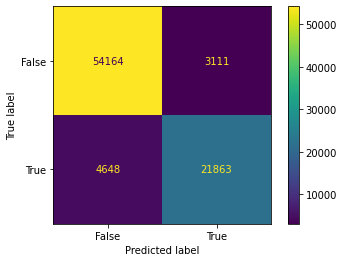

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


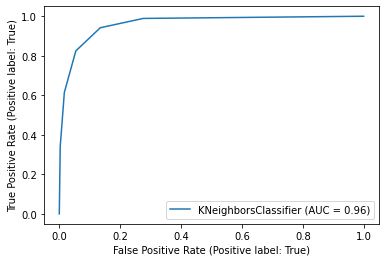

'AUC: 0.8851798285850264'

'F1 Score: 0.8492959114305139'

In [ ]:
# matriz de confusão
plot_confusion_matrix(modelo, X_test, y_test)
plt.show()

# ROC
plot_roc_curve(modelo, X_test, y_test)
plt.show()

# AUC
display(f'AUC: {roc_auc_score(y_test, y_pred)}')

# F1 score
display(f'F1 Score: {f1_score(y_test, y_pred)}')

## MAE, R2, MSE e RMSE DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1), df['ATENDIMENTO_BAIRRO_NOME'], test_size=0.2, random_state=0)

In [ ]:
# criando o modelo
modelo_dt = DecisionTreeRegressor().fit(X_train, y_train)
modelo_dt.score(X_test, y_test)


0.9994747755883882

In [ ]:
y_pred = modelo_dt.predict(X_test)

In [ ]:
# MAE
display(f"MAE: {mean_absolute_error(y_test, y_pred)}")

# R2
display(f"R2: {r2_score(y_test, y_pred)}")

# MSE
display(f"MSE: {mean_squared_error(y_test, y_pred)}")

# RMSE
display(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

'MAE: 0.016255699042799512'

'R2: 0.9994747755883882'

'MSE: 1.3666722364118111'

'RMSE: 1.1690475766245834'

## ROC, AUC e F1 score com LGBMClassifier

In [ ]:
# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('OCORRENCIA_FIM_SEMANA', axis=1), df['OCORRENCIA_FIM_SEMANA'], test_size=0.2, random_state=0)

In [ ]:
# criando o modelo
modelo_LGBMC = LGBMClassifier(random_state=0).fit(X_train, y_train)

In [ ]:
# gerando as predições
y_pred = modelo.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


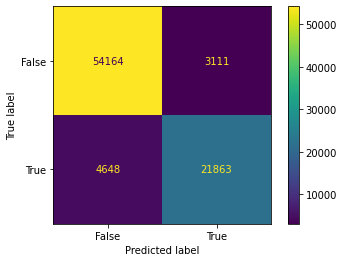

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


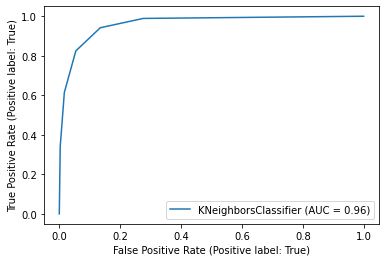

'AUC: 0.8851798285850264'

'F1 Score: 0.8492959114305139'

In [ ]:
# matriz de confusão
plot_confusion_matrix(modelo, X_test, y_test)
plt.show()

# ROC
plot_roc_curve(modelo, X_test, y_test)
plt.show()

# AUC
display(f'AUC: {roc_auc_score(y_test, y_pred)}')

# F1 score
display(f'F1 Score: {f1_score(y_test, y_pred)}')

## MSLE e MAPE

In [ ]:
# MSLE
display(f"RMSE: {mean_squared_log_error(df['OCORRENCIA_DIA'], df['OCORRENCIA_MES'])}")

# MAPE
display(f"MAPE: {mean_absolute_percentage_error(df['OCORRENCIA_DIA'], df['OCORRENCIA_MES'])}")

'RMSE: 1.3840747489753946'

'MAPE: 0.8562573221960479'